In [391]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import theano
import keras
import tensorflow
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
#print(os.listdir("../input"))


In [392]:
churn_data = pd.read_csv('Churn_Modelling.csv',index_col='RowNumber')

In [393]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


In [394]:
# some columns are unproductive remove them
churn_data.drop(['CustomerId','Surname'],axis=1,inplace=True)

In [395]:
# some columns have text data so let's one hot encode them
Geography_dummies = pd.get_dummies(prefix='Geo',data=churn_data,columns=['Geography'])

In [396]:
Gender_dummies = Geography_dummies.replace(to_replace={'Gender': {'Female': 1,'Male':0}})


In [397]:
churn_data_encoded = Gender_dummies

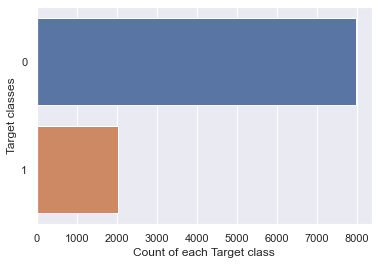

In [398]:
sns.countplot(y=churn_data_encoded.Exited ,data=churn_data_encoded)
plt.xlabel("Count of each Target class")
plt.ylabel("Target classes")
plt.show()

In [399]:
X = churn_data_encoded.drop(['Exited'],axis=1)
y = churn_data_encoded.Exited

In [400]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

In [401]:
# Feature Scaling because yes we don't want one independent variable dominating the other and it makes computations easy
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [402]:
from sklearn import svm

clf = svm.SVC()
clf.fit(X_train, y_train)

SVC()

In [403]:
y_pred = clf.predict(X_test)

In [404]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support
cm = confusion_matrix(y_test, y_pred , labels = None) 

In [405]:
cm

array([[2541,   76],
       [ 396,  287]], dtype=int64)

In [406]:
cm.shape

(2, 2)

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

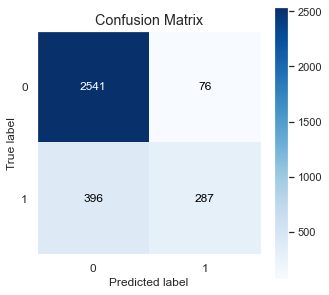

In [407]:
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(
    y_test, 
    y_pred,
    figsize=(5,5))

In [408]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
rf = RandomForestClassifier(max_features=5, n_estimators=500)
rf.fit(X_train, y_train)

RandomForestClassifier(max_features=5, n_estimators=500)

In [409]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [410]:
r_probs = [0 for _ in range(len(y_test))]
rf_probs = rf.predict_proba(X_test)
nb_probs = nb.predict_proba(X_test)

In [411]:
rf_probs = rf_probs[:, 1]
nb_probs = nb_probs[:, 1]

In [412]:
from sklearn.metrics import roc_curve, roc_auc_score
r_auc = roc_auc_score(y_test, r_probs)
rf_auc = roc_auc_score(y_test, rf_probs)
nb_auc = roc_auc_score(y_test, nb_probs)

In [413]:
print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
print('Random Forest: AUROC = %.3f' % (rf_auc))
print('Naive Bayes: AUROC = %.3f' % (nb_auc))

Random (chance) Prediction: AUROC = 0.500
Random Forest: AUROC = 0.867
Naive Bayes: AUROC = 0.778


In [414]:
r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs)

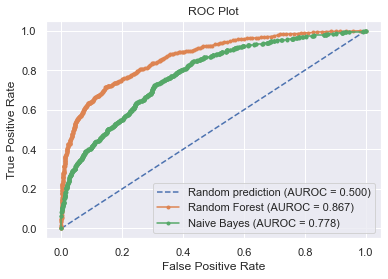

In [415]:
import matplotlib.pyplot as plt
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % rf_auc)
plt.plot(nb_fpr, nb_tpr, marker='.', label='Naive Bayes (AUROC = %0.3f)' % nb_auc)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

Epoch 1/100
670/670 [==============================] - 3s 4ms/step - loss: 3.9123 - accuracy: 0.0778 - val_loss: 3.9498 - val_accuracy: 0.0758
Epoch 2/100
670/670 [==============================] - 4s 5ms/step - loss: 3.9123 - accuracy: 0.0778 - val_loss: 3.9498 - val_accuracy: 0.0758
Epoch 3/100
670/670 [==============================] - 3s 5ms/step - loss: 3.9123 - accuracy: 0.0778 - val_loss: 3.9498 - val_accuracy: 0.0758
Epoch 4/100
670/670 [==============================] - 4s 6ms/step - loss: 3.9123 - accuracy: 0.0778 - val_loss: 3.9498 - val_accuracy: 0.0758
Epoch 5/100
670/670 [==============================] - 4s 6ms/step - loss: 3.9123 - accuracy: 0.0778 - val_loss: 3.9498 - val_accuracy: 0.0758
Epoch 6/100
670/670 [==============================] - 4s 5ms/step - loss: 3.9123 - accuracy: 0.0778 - val_loss: 3.9498 - val_accuracy: 0.0758
Epoch 7/100
670/670 [==============================] - 4s 5ms/step - loss: 3.9123 - accuracy: 0.0778 - val_loss: 3.9498 - val_accuracy: 0.0758

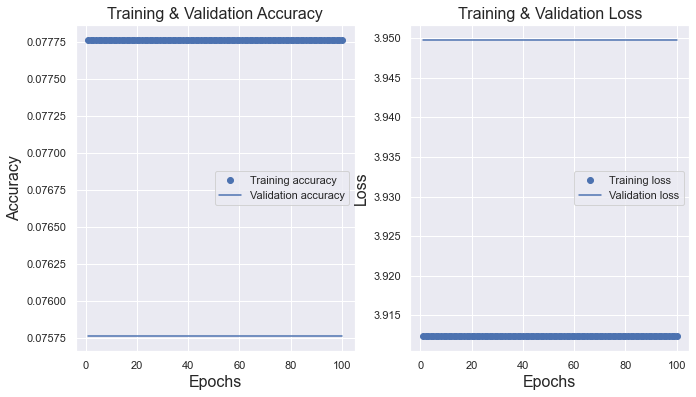

In [418]:
from keras.models import Sequential
from tensorflow.keras import optimizers
classifier = Sequential()
classifier.compile(optimizer=optimizers.RMSprop(lr=0.01),
                loss='binary_crossentropy',
                metrics=['accuracy'])
history = classifier.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=100,
                    batch_size=10)
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']
 
epochs = range(1, len(loss_values) + 1)
fig, ax = plt.subplots(1, 2, figsize=(11, 6))
#
# Plot the model accuracy vs Epochs
#
ax[0].plot(epochs, accuracy, 'bo', label='Training accuracy')
ax[0].plot(epochs, val_accuracy, 'b', label='Validation accuracy')
ax[0].set_title('Training & Validation Accuracy', fontsize=16)
ax[0].set_xlabel('Epochs', fontsize=16)
ax[0].set_ylabel('Accuracy', fontsize=16)
ax[0].legend()
#
# Plot the loss vs Epochs
#
ax[1].plot(epochs, loss_values, 'bo', label='Training loss')
ax[1].plot(epochs, val_loss_values, 'b', label='Validation loss')
ax[1].set_title('Training & Validation Loss', fontsize=16)
ax[1].set_xlabel('Epochs', fontsize=16)
ax[1].set_ylabel('Loss', fontsize=16)
ax[1].legend()

In [417]:
print(" Our accuracy is {}%".format(((cm[0][0] + cm[1][1])/3300)*100))

 Our accuracy is 85.69696969696969%
